<a href="https://colab.research.google.com/github/ixgnoy/Doggo_Classification/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is Google Colab notebook

# 🐶 End-to-end Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dof it is.

## 2. Data
The data I'm using is from Kaggle's dog breed identifiacation competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:
* I'm now deadling with images (Unstructured data) so it's probably best we use deep learning/transfer learning.

* There are 120 breeds of dogs (This means there are 120 different classes.)

* There are around 10,000+ images in the training set. (These images have labels.)

* There are around 10,000+ images in the test set. (These images have no labels, because we'll want to predict them.)






In [ ]:
# Unzip the uploaded data into Google Drive
# !unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision/"

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/Dog_Vision/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: drive/MyDrive/Dog_Vision/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: drive/MyDrive/Dog_Visio

### Get the workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU


In [6]:
# Import TensorFlow into Colab
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.15.0


In [7]:
# Import necessary tools
import tensorflow_hub as hub
print("TensorFlow Hub Version:", hub.__version__)
print("GPU", "available (YES!!!)" if tf.config.list_physical_devices("GPU") else "Not available :(")


TensorFlow Hub Version: 0.16.1
GPU available (YES!!!)


## Getting our data ready ( Turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first.

Let's start by accessing our data and checking out the labels.


In [8]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog_Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: >

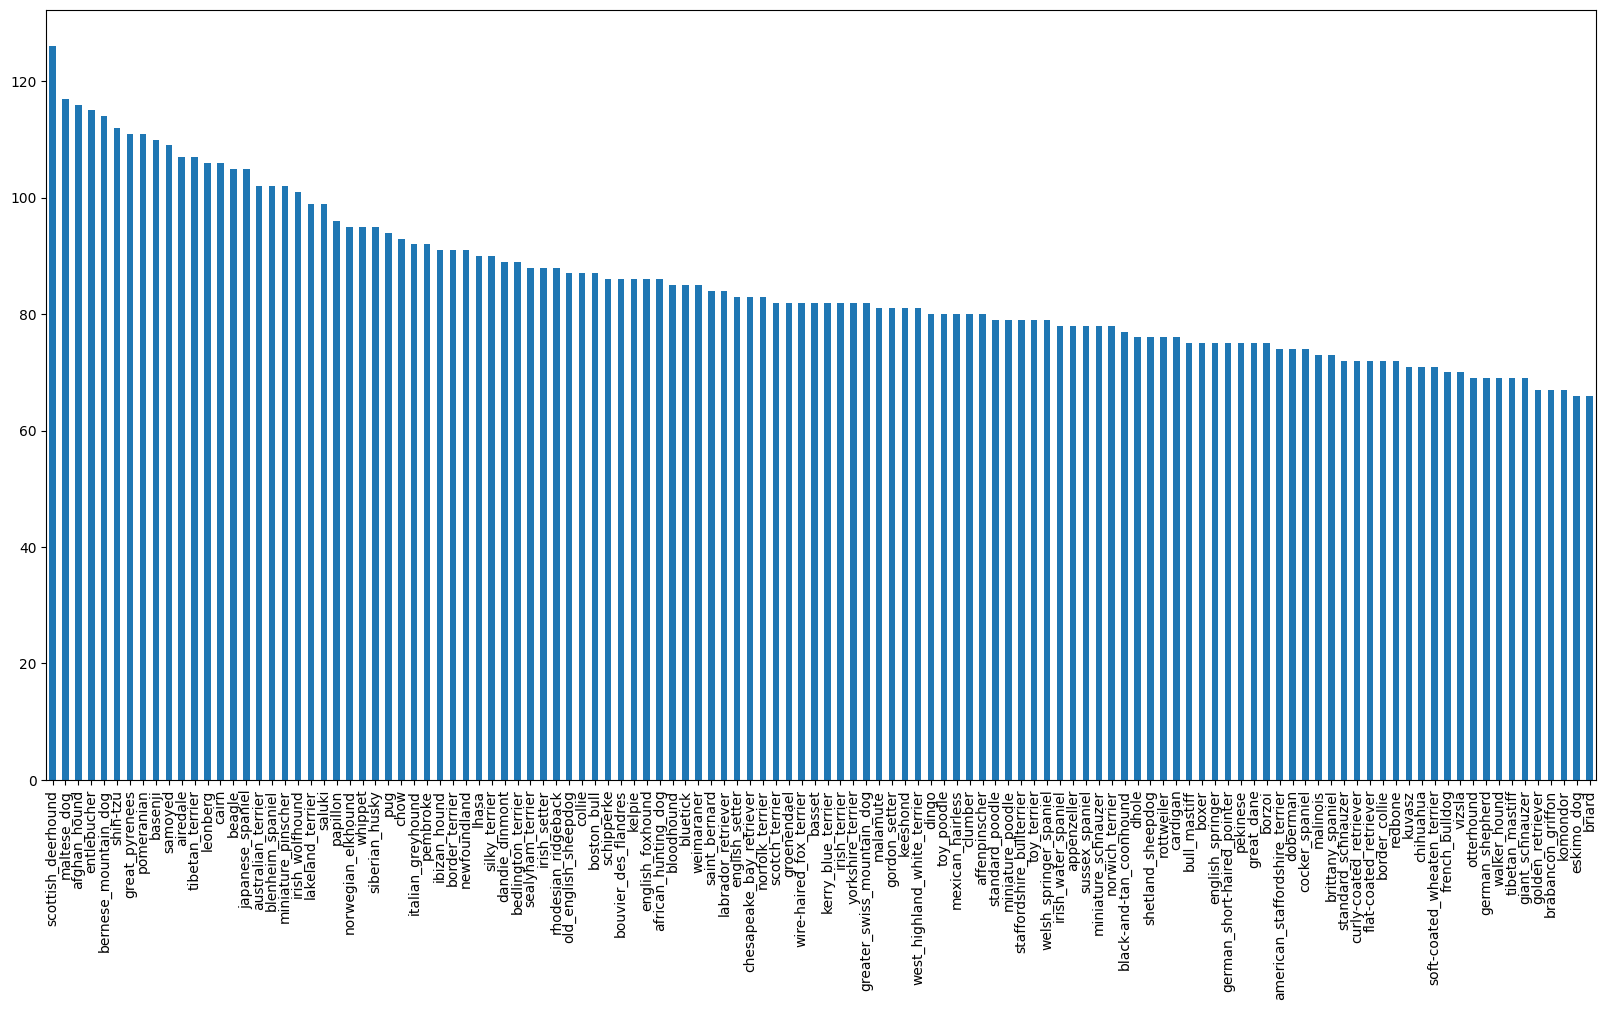

In [11]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [12]:
# What's the median number of images per class?
labels_csv["breed"].value_counts().median()

82.0

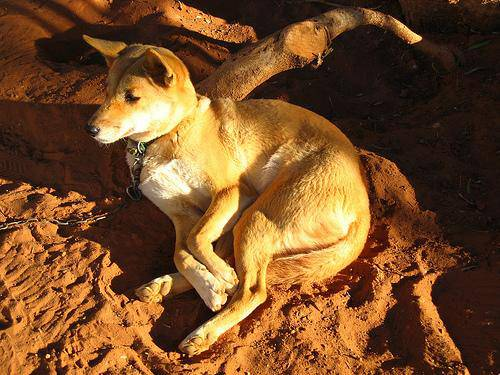

In [31]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their labels
Let's get a list of all of our image file pathnames.

In [32]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [33]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog_Vision/train/" + fname + ".jpg" for fname in labels_csv.id]

# Check the first 10
filenames[:10]

['drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [36]:
# Check whther number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog_Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames do not match actual amount of files, check the target directory.


In [37]:
# One more check
Image(filenames[9000])

FileNotFoundError: No such file or directory: 'drive/MyDrive/Dog_Vision/train/e20e32bf114141e20a1af854ca4d0ecc.jpg'

FileNotFoundError: No such file or directory: 'drive/MyDrive/Dog_Vision/train/e20e32bf114141e20a1af854ca4d0ecc.jpg'

<IPython.core.display.Image object>